# Reddite

In this notebook we are going to show all the used for the analysis. Also we are going to show all the graphics asociated with the data obtaines.


## Introduction

We downloaded data from reddite with various methods, which did not provide the same amount of data, so we standarized to the minimal amount which it could be useful. Those fields are: 
* Date when it was created at.
* ID of the tweet, which is unique.
* The text of the comment.
* The user, which contains the user screen name (username) and the user ID.

After defining that the period of downloading data was finished, the amount of data gathered was: **500000** unique tweets. Which is a decent amount of data to analyse.

## Analysis

1) The first step is to filter the data in different files that will be used for all the analysis. The filter will be keywords (in the meantime), the keywords are the platforms name (i.e. Nintendo, Playstation, Xbox), these keywords are searched in the text and the username. If there is no defined preference (not zero preference) in which platform the record was pointing to, it is inserted in both files.


1) The first analysis to do with this data that is now filtered by platforms, is to count the amount of records per platform. This is done with the next script.

In [ ]:
import time
import sys

if __name__ == '__main__':
    time_start = time.clock()
    # Clean File.
    open("count_hour_by_platform_summary.txt", 'w').close()
    files = ["out2.json"]
    for _file in files:
        # parameters for mrjob.
        # To run your job in multiple subprocesses with a few Hadoop features simulated, use -r local.
        option1 = "" #""-r"
        option2 = "" #""local"
        sys.argv = ['count_hour.py', option1, option2, _file]
        # Write to file in append mode.
        _fo = open("count_hour_by_platform_summary.txt", 'a')
        sys.stdout = _fo
        print _file
        execfile('count_hour.py')
        print "\n"

    time_end = time.clock()

    print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol
from datetime import datetime
import itertools

class MRWordFrequencyCount(MRJob):
	INPUT_PROTOCOL = JSONValueProtocol

	def mapper(self, _, record):
		date = datetime.fromtimestamp(int(record['created_at']))
		week = date.isocalendar()[1]
		yield week, int(record['created_at'])

	def reducer(self, key, values):
		for i in values:
			yield (key, datetime.fromtimestamp(i).hour), 1
	def max_reducer(self, stat, values):
		yield stat, sum(values)

	def steps(self):
		return [MRStep(mapper=self.mapper, reducer=self.reducer),
				MRStep(reducer=self.max_reducer)]

if __name__ == '__main__':
	MRWordFrequencyCount.run()


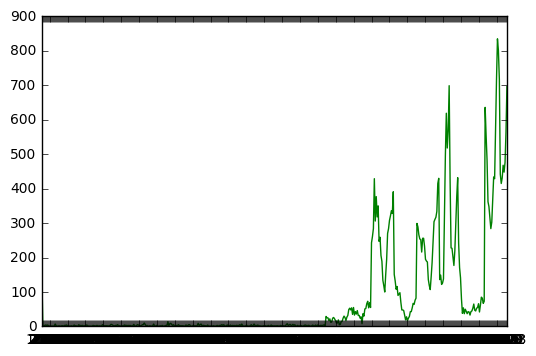

In [1]:
import matplotlib.pyplot as plt
archivo = open("count_hour_by_platform_summary.txt")
archivo.readline()
pos = []
chars_to_remove = [',', '[', ']', '"']
for i in archivo:
	line = i.translate(None, ''.join(chars_to_remove))
	line = line.split()
	pos.append([int(line[0]), int(line[1]), int(line[2])])

x_pos = []
x_pos_name = []
y_pos = []
count = 0
for i in sorted(pos):
	x_pos.append(count)
	x_pos_name.append(str(i[0])+ " " + str(i[1]))
	y_pos.append(i[2])
	count += 1

plt.xticks(x_pos, x_pos_name)
pos_plt = plt.plot(x_pos, y_pos, 'g')
plt.show()

3) The next analysis to do is to count the amount of unique users per platform. This is done with the next script.

In [ ]:
import time
import sys

if __name__ == '__main__':
    time_start = time.clock()
    # Clean File.
    open("user_amount_by_platform_summary.txt", 'w').close()
    files = ["out2.json"]
    for _file in files:
        # parameters for mrjob.
        # To run your job in multiple subprocesses with a few Hadoop features simulated, use -r local.
        option1 = "" #""-r"
        option2 = "" #""local"
        sys.argv = ['user_amount.py', option1, option2, _file]
        # Write to file in append mode.
        _fo = open("user_amount_by_platform_summary.txt", 'a')
        sys.stdout = _fo
        print _file
        execfile('user_amount.py')
        print "\n"

    time_end = time.clock()

    print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol
import time
import itertools
import sys

class MRWordFrequencyCount(MRJob):
    INPUT_PROTOCOL = JSONValueProtocol

    def mapper(self, _, record):
        yield [record['user_id'], 1]

    def reducer(self, key, values):
        yield [key, 1]

    def mapper2(self, key, values):
        yield ['amount_users', values]

    def reducer2(self, key, values):
        yield [key, sum(values)]

    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer),
                MRStep(mapper=self.mapper2, reducer=self.reducer2)]


if __name__ == '__main__':
    #time_start = time.clock()
    MRWordFrequencyCount().run()
    #time_end = time.clock()
    #print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


**Results**

"amount_users"	14300


Time taken to completion of the metric: 4.039858 in processor time



4) The next analysis is to calculate the Top 10 users that generate the most content in each platform. This is done with the next script.

In [ ]:
import time
import sys

if __name__ == '__main__':
    time_start = time.clock()
    # Clean File.
    open("top_users_by_platform_summary.txt", 'w').close()
    files = ["out2.json"]
    for _file in files:
        # parameters for mrjob.
        # To run your job in multiple subprocesses with a few Hadoop features simulated, use -r local.
        option1 = "" #""-r"
        option2 = "" #""local"
        sys.argv = ['top_users.py', option1, option2, _file]
        # Write to file in append mode.
        _fo = open("top_users_by_platform_summary.txt", 'a')
        sys.stdout = _fo
        print _file
        execfile('top_users.py')
        print "\n"

    time_end = time.clock()

    print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol
import time
import itertools
import operator
import sys

class MRWordFrequencyCount(MRJob):
    INPUT_PROTOCOL = JSONValueProtocol

    def mapper(self, _, record):
        name = record['user_id']
        if name == "GoGoGadgetReddit" or name == "[deleted]" or name == " ":
            pass
        else:
            yield [record['user_id'], 1]

    def reducer(self, key, values):
        yield ["top_user", (sum(values), key)]

    def reducer2(self, key, values):
        user_ids = []
        user_tweets = []
        for value in values:
            user_ids.append(value[1])
            user_tweets.append(value[0])
        user = {}
        for i in xrange(0, len(user_ids)):
            user[user_ids[i]] = user_tweets[i]
        top_users = sorted(user.items(), key=lambda x: (x[1], operator.itemgetter(0)), reverse=True)
        for user in top_users[0:10]:
            #print user[0], user[1]
            yield [user[0], user[1]]

    def steps(self):
        return [MRStep(mapper=self.mapper, reducer=self.reducer),
                MRStep(reducer=self.reducer2)]


if __name__ == '__main__':
    #time_start = time.clock()
    MRWordFrequencyCount().run()
    #time_end = time.clock()
    #print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


**Results**

out2.json

"Mariomaster2015"	98

"AutoModerator"	97

"Quincea4"	95

"TSPhoenix"	94

"mjmannella"	85

"mikey102880"	84

"SpahsgonnaSpah"	78

"Trinitronity"	77

"thescottishlion"	74

"Voyager5555"	73


Time taken to completion of the metric: 3.496951 in processor time


**Analysis**

From this we can see that (requires more analysis).

5) Sentimientos

In [ ]:
import time
import sys

if __name__ == '__main__':
    time_start = time.clock()
    # Clean File.
    open("count_sentim_by_platform_summary.txt", 'w').close()
    files = ["out2.json"]
    for _file in files:
        # parameters for mrjob.
        # To run your job in multiple subprocesses with a few Hadoop features simulated, use -r local.
        option1 = "" #""-r"
        option2 = "" #""local"
        sys.argv = ['count_sentim.py', option1, option2, _file]
        # Write to file in append mode.
        _fo = open("count_sentim_by_platform_summary.txt", 'a')
        sys.stdout = _fo
        print _file
        execfile('count_sentim.py')
        print "\n"

    time_end = time.clock()

    print "Time taken to completion of the metric: {0} in processor time".format(time_end - time_start)


In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol
from datetime import datetime
import itertools

class MRWordFrequencyCount(MRJob):
	INPUT_PROTOCOL = JSONValueProtocol

	def mapper(self, _, record):
		
		yield record['classification'], 1

	def max_reducer(self, stat, values):
		yield stat, sum(values)

	def steps(self):
		return [MRStep(mapper=self.mapper, reducer=self.max_reducer)]

if __name__ == '__main__':
	MRWordFrequencyCount.run()

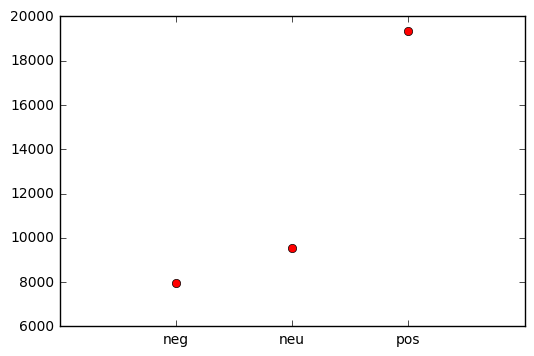

In [2]:
import matplotlib.pyplot as plt
y = [7962, 9521, 19322]
x = [0, 1, 2]
x_name = ['neg', 'neu', 'pos']
plt.xticks(x, x_name)
plt.plot(x, y, 'ro')
axes = plt.gca()
axes.set_xlim([-1,3])
plt.show()

6) Lenguaje

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk').next
archivo = open("languages_amount_by_platform_summary.txt")
archivo.readline()
archivo.readline()
languages = {}
chars_to_remove = [',', '[', ']', '"']
while True:
	i = archivo.readline()
	line = i.translate(None, ''.join(chars_to_remove))
	line = line.split()
	if len(line) == 0:
		break
	if line[2] not in languages.keys():
		languages[line[2]] = []
	languages[line[2]].append([int(line[0]), int(line[1]), int(line[3])])
ax = plt.subplot(111)
for i in languages.keys():
	x = []
	x_name = []
	y = []
	count = 0
	for j in sorted(languages[i]):
		x.append(count)
		x_name.append(str(j[0])+ " " + str(j[1]))
		y.append(j[2])
		count += 1

	plt.xticks(x, x_name)
	plt.plot(x, y,label=i)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

archivo.readline()
archivo.readline()
languages = {}
chars_to_remove = [',', '[', ']', '"']
while True:
	i = archivo.readline()
	line = i.translate(None, ''.join(chars_to_remove))
	line = line.split()
	if len(line) == 0:
		break
	if line[2] not in languages.keys():
		languages[line[2]] = []
	languages[line[2]].append([int(line[0]), int(line[1]), int(line[3])])
ax = plt.subplot(111)
for i in languages.keys():
	x = []
	x_name = []
	y = []
	count = 0
	for j in sorted(languages[i]):
		x.append(count)
		x_name.append(str(j[0])+ " " + str(j[1]))
		y.append(j[2])
		count += 1

	plt.xticks(x, x_name)
	plt.plot(x, y,label=i)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
import sys
import json
reload(sys)
sys.setdefaultencoding('utf8')
try:
    from nltk import wordpunct_tokenize
    from nltk.corpus import stopwords
except ImportError:
    print '[!] You need to install nltk (http://nltk.org/index.html)'



#----------------------------------------------------------------------
def _calculate_languages_ratios(text):
    """
    Calculate probability of given text to be written in several languages and
    return a dictionary that looks like {'french': 2, 'spanish': 4, 'english': 0}
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Dictionary with languages and unique stopwords seen in analyzed text
    @rtype: dict
    """

    languages_ratios = {}

    '''
    nltk.wordpunct_tokenize() splits all punctuations into separate tokens
    
    >>> wordpunct_tokenize("That's thirty minutes away. I'll be there in ten.")
    ['That', "'", 's', 'thirty', 'minutes', 'away', '.', 'I', "'", 'll', 'be', 'there', 'in', 'ten', '.']
    '''

    tokens = wordpunct_tokenize(text)
    words = [word.lower() for word in tokens]

    # Compute per language included in nltk number of unique stopwords appearing in analyzed text
    for language in stopwords.fileids():
        stopwords_set = set(stopwords.words(language))
        words_set = set(words)
        common_elements = words_set.intersection(stopwords_set)

        languages_ratios[language] = len(common_elements) # language "score"

    return languages_ratios


#----------------------------------------------------------------------
def detect_language(text):
    """
    Calculate probability of given text to be written in several languages and
    return the highest scored.
    
    It uses a stopwords based approach, counting how many unique stopwords
    are seen in analyzed text.
    
    @param text: Text whose language want to be detected
    @type text: str
    
    @return: Most scored language guessed
    @rtype: str
    """

    ratios = _calculate_languages_ratios(text)

    most_rated_language = max(ratios, key=ratios.get)

    return most_rated_language



if __name__=='__main__':
    f = file('out2.json', 'w')
    sys.stdout = f
    orig_stdout = sys.stdout
    with open('out.json') as json_data:
        for j in json_data:
            d = json.loads(j)
            language = detect_language(d['text'].encode('utf-8'))
            d.update({'lenguage' :language})
            print(json.dumps(d, ensure_ascii=False))
    sys.stdout = orig_stdout
    f.close()           


In [ ]:
out2.json
"danish"	130
"dutch"	176
"english"	33099
"finnish"	43
"french"	45
"german"	87
"hungarian"	137
"italian"	9
"norwegian"	19
"portuguese"	358
"spanish"	41
"swedish"	2661


Time taken to completion of the metric: 2.606543 in processor time
